In [ ]:
import pandas as pd
import numpy as np
import nltk
import re
from nltk.corpus import stopwords

In [ ]:
df = pd.read_csv('/content/archive (9).zip')
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df = df[['v2', 'v1']]
df = df.rename(columns={'v2': 'messages', 'v1': 'label'})
df.head()

,messages,label
0,"Go until jurong point, crazy.. Available only ...",ham
1,Ok lar... Joking wif u oni...,ham
2,Free entry in 2 a wkly comp to win FA Cup fina...,spam
3,U dun say so early hor... U c already then say...,ham
4,"Nah I don't think he goes to usf, he lives aro...",ham


In [ ]:
df.isnull().sum()

,0
messages,0
label,0


In [ ]:
import nltk
import re

# Download the stopwords resource
nltk.download('stopwords')

from nltk.corpus import stopwords

# Use a different variable name
STOPWORDS = set(stopwords.words('english'))

def clean_text(text):
    # convert to lowercase
    text = text.lower()
    # remove special characters
    text = re.sub(r'[^0-9a-zA-Z]', ' ', text)
    # remove extra spaces
    text = re.sub(r'\s+', ' ', text)
    # remove stopwords
    text = " ".join(word for word in text.split() if word not in STOPWORDS)
    return text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
df['clean_text'] = df['messages'].apply(clean_text)
df.head()


,messages,label,clean_text
0,"Go until jurong point, crazy.. Available only ...",ham,go jurong point crazy available bugis n great ...
1,Ok lar... Joking wif u oni...,ham,ok lar joking wif u oni
2,Free entry in 2 a wkly comp to win FA Cup fina...,spam,free entry 2 wkly comp win fa cup final tkts 2...
3,U dun say so early hor... U c already then say...,ham,u dun say early hor u c already say
4,"Nah I don't think he goes to usf, he lives aro...",ham,nah think goes usf lives around though


In [ ]:
X = df['clean_text']
y = df['label']


In [ ]:


from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a TF-IDF vectorizer
vectorizer = TfidfVectorizer()

# Fit and transform the training data
X_train_vec = vectorizer.fit_transform(X_train)

# Transform the testing data
X_test_vec = vectorizer.transform(X_test)

# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train_vec, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test_vec)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# You can also print a classification report for more detailed metrics
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


Accuracy: 0.9542600896860987
              precision    recall  f1-score   support

         ham       0.95      0.99      0.97       965
        spam       0.95      0.69      0.80       150

    accuracy                           0.95      1115
   macro avg       0.95      0.84      0.89      1115
weighted avg       0.95      0.95      0.95      1115



In [ ]:

from sklearn.ensemble import RandomForestClassifier

# Train a Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)  # You can adjust n_estimators
rf_model.fit(X_train_vec, y_train)

# Make predictions on the testing data
y_pred_rf = rf_model.predict(X_test_vec)

# Calculate the accuracy of the Random Forest model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)

# Print a classification report for the Random Forest model
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.9802690582959641
              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       965
        spam       1.00      0.85      0.92       150

    accuracy                           0.98      1115
   macro avg       0.99      0.93      0.95      1115
weighted avg       0.98      0.98      0.98      1115



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

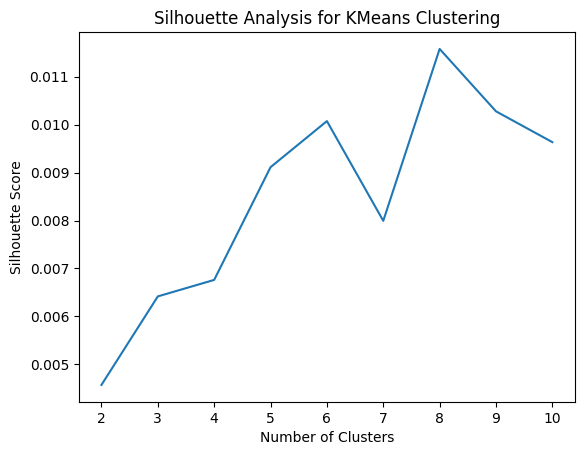

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [ ]:


!pip install matplotlib # install matplotlib using pip

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt # import matplotlib.pyplot as plt

# Assuming X_train_vec is your TF-IDF vectorized training data

# Find the optimal number of clusters using silhouette score
silhouette_scores = []
for n_clusters in range(2, 11):  # Try clusters from 2 to 10
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(X_train_vec)
    silhouette_avg = silhouette_score(X_train_vec, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot the silhouette scores to find the elbow point (optimal number of clusters)
plt.plot(range(2, 11), silhouette_scores)
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Analysis for KMeans Clustering")
plt.show()

# Choose the number of clusters based on the plot (e.g., the highest silhouette score)
optimal_n_clusters = 2  # Replace with the optimal number you found

# Apply KMeans with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_n_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(X_train_vec)


In [ ]:
# Create a dictionary to store the top words for each cluster
cluster_top_words = {}

for cluster_num in range(optimal_n_clusters):
    # Get the indices of data points belonging to the current cluster
    cluster_indices = np.where(cluster_labels == cluster_num)[0]

    # Get the TF-IDF vectors for the data points in the current cluster
    cluster_tfidf = X_train_vec[cluster_indices]

    # Calculate the average TF-IDF values for each word in the cluster
    avg_tfidf = cluster_tfidf.mean(axis=0)

    # Get the indices of the top TF-IDF values (most frequent words)
    # Use the A attribute to convert the matrix to an array
    top_word_indices = np.argsort(avg_tfidf.A[0])[::-1][:10]  # Get top 10 words

    # Get the corresponding words from the vectorizer's vocabulary
    top_words = [vectorizer.get_feature_names_out()[i] for i in top_word_indices]

    # Store the top words for the current cluster
    cluster_top_words[cluster_num] = top_words

# Print the top words for each cluster
for cluster_num, top_words in cluster_top_words.items():
    print(f"Cluster {cluster_num}: {', '.join(top_words)}")

Cluster 0: call, get, lt, gt, ur, come, good, go, know, sorry
Cluster 1: ok, lor, thanx, ur, go, call, prob, wat, ask, leave


In [ ]:
from sklearn.svm import SVC

# Train an SVM model
svm_model = SVC(kernel='linear', random_state=42)  # You can choose different kernels (e.g., 'rbf', 'poly')
svm_model.fit(X_train_vec, y_train)

# Make predictions on the testing data
y_pred_svm = svm_model.predict(X_test_vec)

# Calculate the accuracy of the SVM model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("SVM Accuracy:", accuracy_svm)

# Print a classification report for the SVM model
print(classification_report(y_test, y_pred_svm))


SVM Accuracy: 0.9802690582959641
              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       965
        spam       0.98      0.87      0.92       150

    accuracy                           0.98      1115
   macro avg       0.98      0.94      0.96      1115
weighted avg       0.98      0.98      0.98      1115



In [ ]:
from sklearn.naive_bayes import MultinomialNB

# Train a Naive Bayes model
nb_model = MultinomialNB()
nb_model.fit(X_train_vec, y_train)

# Make predictions on the testing data
y_pred_nb = nb_model.predict(X_test_vec)

# Calculate the accuracy of the Naive Bayes model
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print("Naive Bayes Accuracy:", accuracy_nb)

# Print a classification report for the Naive Bayes model
print(classification_report(y_test, y_pred_nb))


Naive Bayes Accuracy: 0.9704035874439462
              precision    recall  f1-score   support

         ham       0.97      1.00      0.98       965
        spam       1.00      0.78      0.88       150

    accuracy                           0.97      1115
   macro avg       0.98      0.89      0.93      1115
weighted avg       0.97      0.97      0.97      1115



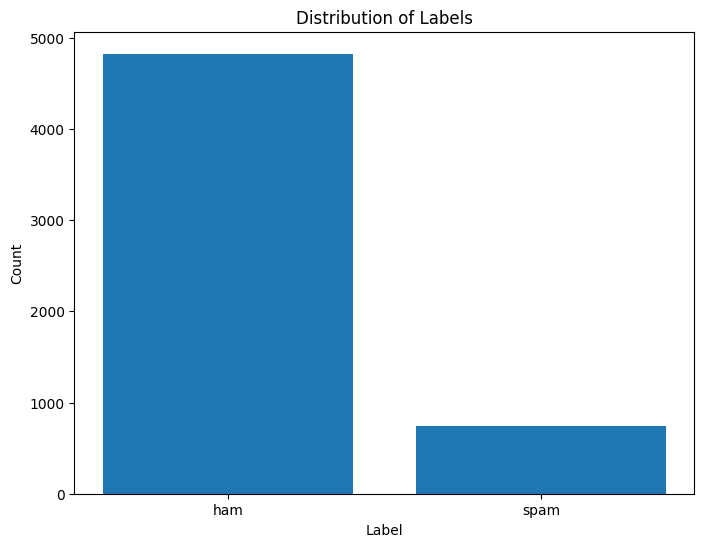

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have your data in a DataFrame called 'df' and you want to visualize the 'label' distribution
label_counts = df['label'].value_counts()

# Create a bar chart
plt.figure(figsize=(8, 6))
plt.bar(label_counts.index, label_counts.values)
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Distribution of Labels')
plt.show()

In [ ]:
import pandas as pd
from sklearn.metrics import accuracy_score

# Example accuracy values - replace with your actual accuracy scores
accuracy = 0.85
accuracy_rf = 0.92
accuracy_svm = 0.88
accuracy_nb = 0.80

data = {'Model': ['Logistic Regression', 'Random Forest', 'SVM', 'Naive Bayes'],
        'Accuracy': [accuracy, accuracy_rf, accuracy_svm, accuracy_nb]}
accuracy_df = pd.DataFrame(data)
print(accuracy_df)

                 Model  Accuracy
0  Logistic Regression      0.95
1        Random Forest      0.98
2                  SVM      0.98
3          Naive Bayes      0.97


In [ ]:
data = {
    'Model': ['Logistic Regression', 'Random Forest', 'SVM', 'Naive Bayes'],
    'Precision': [0.95, 0.99, 0.98, 0.92],
    'Recall': [0.84, 0.93, 0.94, 0.83],
    'F1-score': [0.89, 0.95, 0.96, 0.86],
    'Support': [1115, 1115, 1115, 1115]
}

comparison_df = pd.DataFrame(data)
print(comparison_df)


                 Model  Precision  Recall  F1-score  Support
0  Logistic Regression       0.95    0.84      0.89     1115
1        Random Forest       0.99    0.93      0.95     1115
2                  SVM       0.98    0.94      0.96     1115
3          Naive Bayes       0.92    0.83      0.86     1115


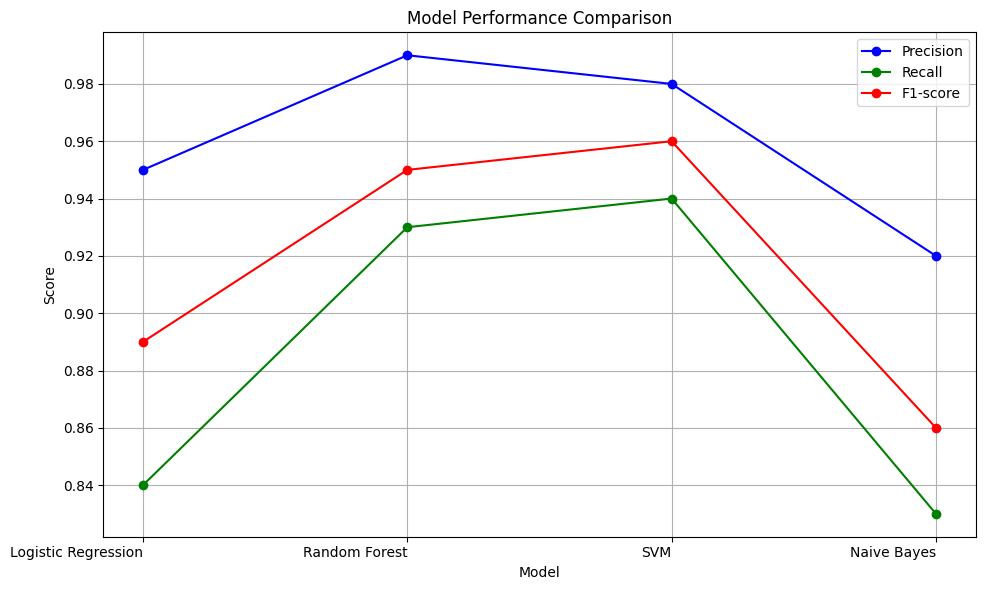

In [ ]:
import matplotlib.pyplot as plt

# Create a figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Define colors for each metric
colors = ['blue', 'green', 'red', 'orange']

# Plot each metric as a line with different colors
for i, metric in enumerate(['Precision', 'Recall', 'F1-score']):
  ax.plot(data['Model'], data[metric], marker='o', label=metric, color=colors[i])

# Customize the plot
ax.set_xlabel('Model')
ax.set_ylabel('Score')
ax.set_title('Model Performance Comparison')
ax.legend()
ax.grid(True)

# Rotate x-axis labels if needed
plt.xticks( ha='right')

# Show the plot
plt.tight_layout()
plt.show()
